In [1]:
import random as rand
import math
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
import scipy.stats as stats

In [2]:
x_red = []
y_red = []
x_blue = []
y_blue = []
n = 500
n1 = 100
k=5

In [3]:
def beta_data(n,a,b):
    x_overal = np.random.beta(a,b,n)
    y_overal = np.random.beta(a,b,n)

    
    flag = 0
    beta_params = stats.beta.fit(x_overal)
    x_overal = stats.beta.pdf(x_overal, beta_params[0], beta_params[1], beta_params[2], beta_params[3])
    beta_params1 = stats.beta.fit(y_overal)
    y_overal = stats.beta.pdf(y_overal, beta_params1[0], beta_params1[1], beta_params1[2], beta_params1[3])
    x_result = []
    y_result = []
    for i in range(0,len(x_overal)-1):
        if x_overal[i]>10 or x_overal[i]<5:
            continue
        else:
            
            
            x_result.append(x_overal[i])
            flag = flag + 1
            if flag == int(n/2):
                break
    
    flag = 0       
    for j in range(0,len(y_overal)-1):
        if y_overal[j]>10 or y_overal[j]<5:
            continue
        else:
            
            y_result.append(y_overal[j])
            flag = flag + 1
            if flag == int(n/2):
                break
        
    return x_result,y_result




/Users/hediyeraisy/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


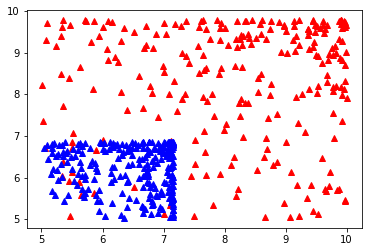

In [4]:
x_red, y_red = beta_data(n,80,20)
x_blue, y_blue = beta_data(n,50,30)
plt.plot(x_red,y_red,'r^',x_blue,y_blue,'b^')

In [5]:
x_data = []
y_data = []
for z in range(0,int(n1/2)):
    x_data.append([x_red[z],y_red[z]])
    y_data.append(0)
for m in range(0,int(n1/2)):
    x_data.append([x_blue[m],y_blue[m]])
    y_data.append(1)
    

Confusion Matrix for Euclidian:
[[8 2]
 [1 9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

Accuracy: 0.85

Confusion Matrix for Minkowski:
[[8 2]
 [1 9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

Accuracy: 0.85

Confusion Matrix for Minkowski:
[[8 2]
 [1 9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      

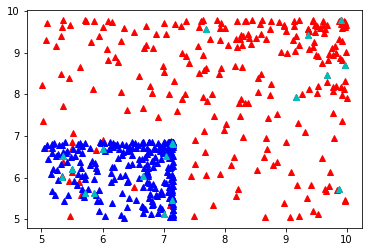

In [6]:
result1 = 0
result2 = 0
result3 = 0
# for i in range(0,10):
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 0)

test_x = []
test_y = []
for i in range(0,len(x_test)-1):
    test_x.append(x_test[i][0])
    test_y.append(x_test[i][1])

plt.plot(x_red,y_red,'r^',x_blue,y_blue,'b^',test_x,test_y,'c^')
#use python library for knn metric=Euclidean
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', p = 2)
knn1.fit(x_train,y_train)
ypred_1 = knn1.predict(x_test) #These are the predicted output values

#confusion matrix and accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred_1)
print("Confusion Matrix for Euclidian:")
print(result)
result1 = classification_report(y_test, ypred_1)
print("Classification Report:")
print (result1)
result = accuracy_score(y_test,ypred_1)
print("Accuracy:",result)
    

# use python library for knn metric = Minkowski
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
knn2.fit(x_train,y_train)
ypred_2 = knn2.predict(x_test) #These are the predicted output values

#confusion matrix and accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred_2)
print("\nConfusion Matrix for Minkowski:")
print(result)
result1 = classification_report(y_test, ypred_2)
print("Classification Report:")
print (result1)
result = accuracy_score(y_test,ypred_2)
print("Accuracy:",result)
    
#use python library for knn metric = Manhattan
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = k, metric = 'manhattan', p = 1)
knn3.fit(x_train,y_train)
ypred_3 = knn3.predict(x_test) #These are the predicted output values

#confusion matrix and accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred_3)
print("\nConfusion Matrix for Minkowski:")
print(result)
result1 = classification_report(y_test, ypred_3)
print("Classification Report:")
print (result1)
result = accuracy_score(y_test,ypred_3)
print("Accuracy:",result)
    
